In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
flights_df = pd.read_csv("FlightDelays.csv")

In [5]:
flights_df.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,01/01/2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,01/01/2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,01/01/2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,01/01/2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,01/01/2004,7814,IAD,0,4,1,N685BR,ontime


In [6]:
flights_df.dtypes

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
Flight Status    object
dtype: object

In [7]:
# Summary statistics
flights_df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [8]:
#above dataset shows minimum value for departure time as 10 which is incorrect, as it should be 1000 which shows 10 am format for the flight
flights_df.loc[flights_df['DEP_TIME'] == 10, 'DEP_TIME'] = 1000
flights_df.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.748751,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,441.582628,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,109.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [9]:
#standardise columns name
#removing space and capitalizing all column names

flights_df.columns = [s.strip().replace(' ', '_').upper() for s in flights_df.columns]
flights_df.columns


Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'WEATHER', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'FLIGHT_STATUS'],
      dtype='object')

In [10]:
#checking for null values
flights_df.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
WEATHER          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
FLIGHT_STATUS    0
dtype: int64

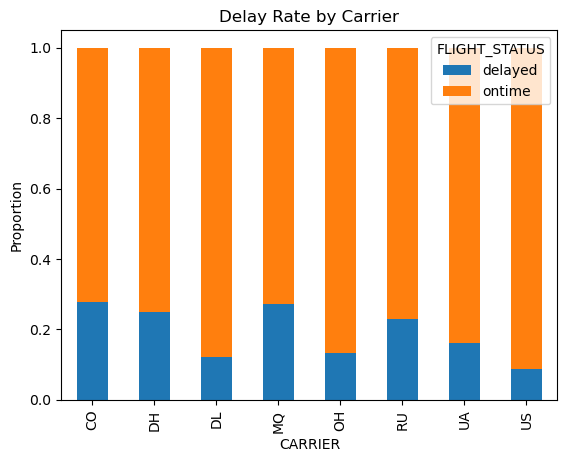

In [11]:
# Delay rate by carrier
carrier_delay_rate = flights_df.groupby('CARRIER')['FLIGHT_STATUS'].value_counts(normalize=True).unstack()
carrier_delay_rate.plot(kind='bar', stacked=True)
plt.title('Delay Rate by Carrier')
plt.ylabel('Proportion')
plt.show()

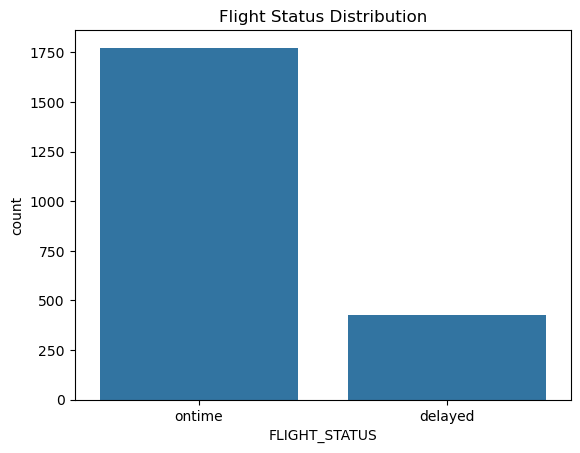

In [12]:
# Bar plot for Flight Status
import seaborn as sns
sns.countplot(x='FLIGHT_STATUS', data=flights_df)
plt.title('Flight Status Distribution')
plt.show()

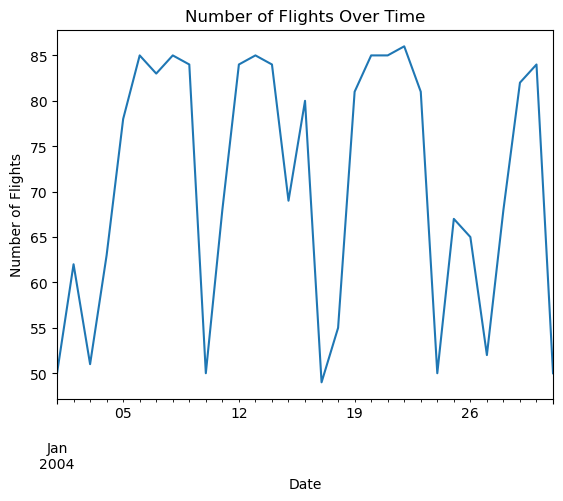

In [13]:
# Time series plot for delays over days of the month-OPTIONAL(NOT SURE WHETHER TO INCLUDE OR NOT)
flights_df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'])
flights_df.set_index('FL_DATE', inplace=True)
flights_df['FLIGHT_STATUS'].resample('D').count().plot()
plt.title('Number of Flights Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.show()


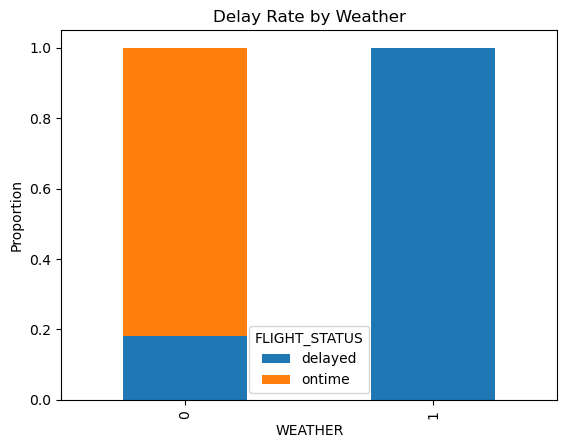

In [14]:
# Delay Rate by weather
carrier_delay_rate = flights_df.groupby('WEATHER')['FLIGHT_STATUS'].value_counts(normalize=True).unstack()
carrier_delay_rate.plot(kind='bar', stacked=True)
plt.title('Delay Rate by Weather')
plt.ylabel('Proportion')
plt.show()

In [15]:
#number of flights from each airport
flights_df['ORIGIN'].value_counts()

ORIGIN
DCA    1370
IAD     686
BWI     145
Name: count, dtype: int64

In [16]:
#for the simplicity of the analysis, we will go forward with the data with DCA as a carrier
#selecting data for Dca only
DCA_df = flights_df[flights_df['ORIGIN'] == 'DCA']
print(DCA_df)

            CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE  FL_NUM ORIGIN  \
FL_DATE                                                                    
2004-01-01          1640      DH      1640  JFK       213    6155    DCA   
2004-01-01          1455      DL      1458  JFK       213     746    DCA   
2004-01-01           930      DL       932  LGA       214    1746    DCA   
2004-01-01          1230      DL      1228  LGA       214    1752    DCA   
2004-01-01          1430      DL      1429  LGA       214    1756    DCA   
...                  ...     ...       ...  ...       ...     ...    ...   
2004-01-31           930      RU       925  EWR       199    2582    DCA   
2004-01-31           645      RU       644  EWR       199    2761    DCA   
2004-01-31          1600      RU      1558  EWR       199    2361    DCA   
2004-01-31          1359      RU      1403  EWR       199    2216    DCA   
2004-01-31          1730      RU      1736  EWR       199    2097    DCA   

           

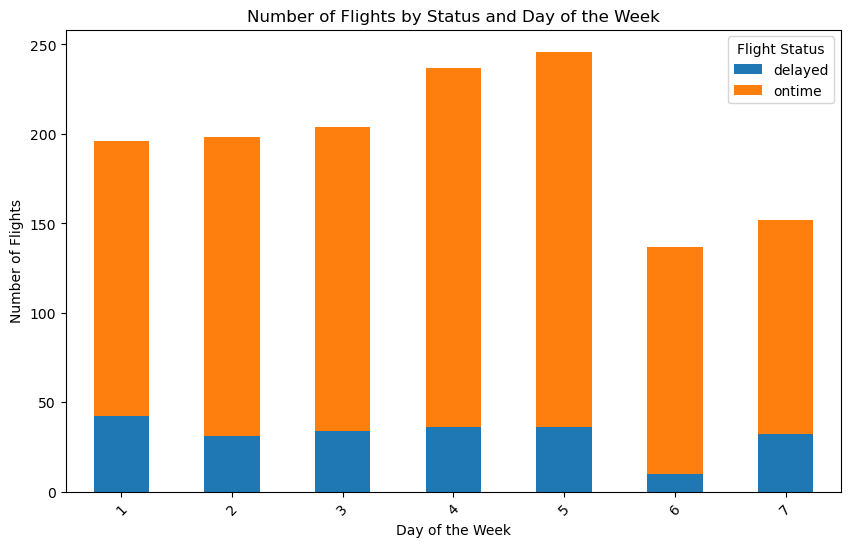

In [17]:
#to check the distribution of the flight status by the days of the week
grouped_data = DCA_df.groupby(['DAY_WEEK', 'FLIGHT_STATUS']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Flights by Status and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.legend(title='Flight Status')
plt.xticks(rotation=45)
plt.show()

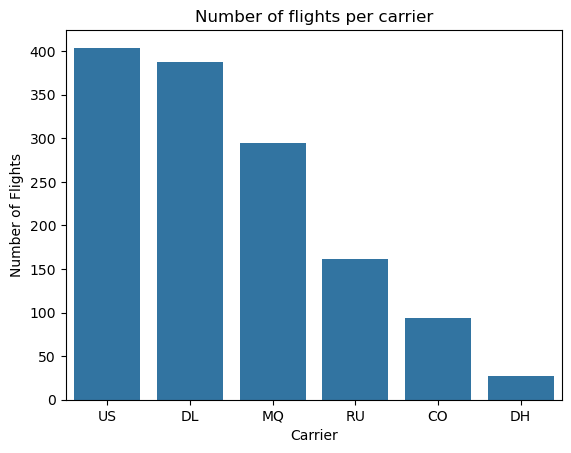

In [18]:
#distrubution of flights across carrier
carrier_counts = DCA_df['CARRIER'].value_counts()
sns.barplot(x=carrier_counts.index, y=carrier_counts.values)
plt.title('Number of flights per carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.show()


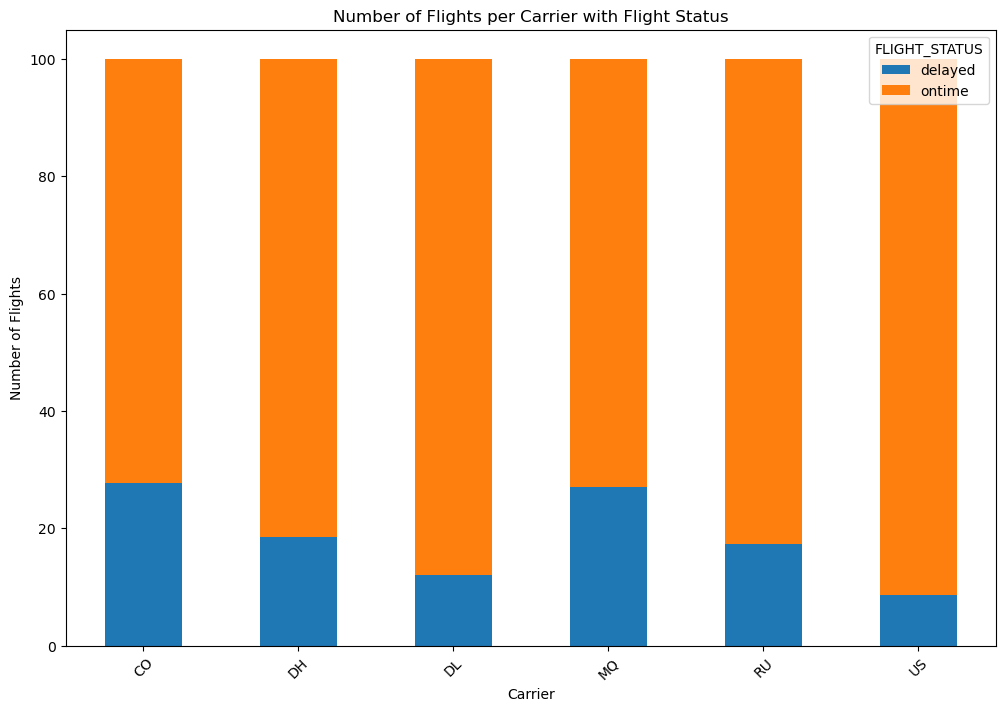

In [19]:
#proportion of delayed and ontime flights from each carrier
aggregated_data = DCA_df.groupby(['CARRIER', 'FLIGHT_STATUS']).size().unstack(fill_value=0)
aggregated_data_percent = aggregated_data.div(aggregated_data.sum(axis=1), axis=0) * 100
ax = aggregated_data_percent.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Flights per Carrier with Flight Status')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

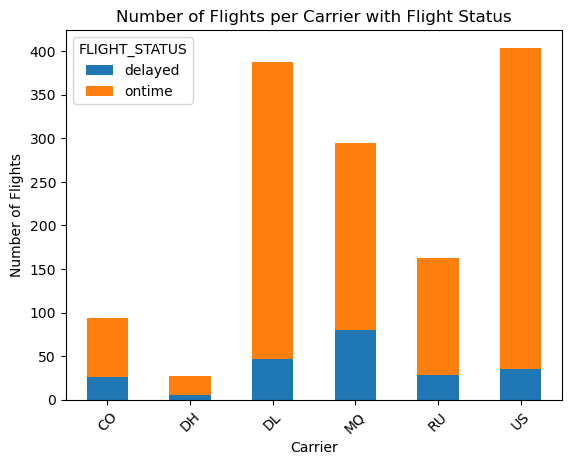

In [20]:
aggregated_data = DCA_df.groupby(['CARRIER', 'FLIGHT_STATUS']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
aggregated_data.plot(kind='bar', stacked=True)
plt.title('Number of Flights per Carrier with Flight Status')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

In [21]:
%matplotlib inline

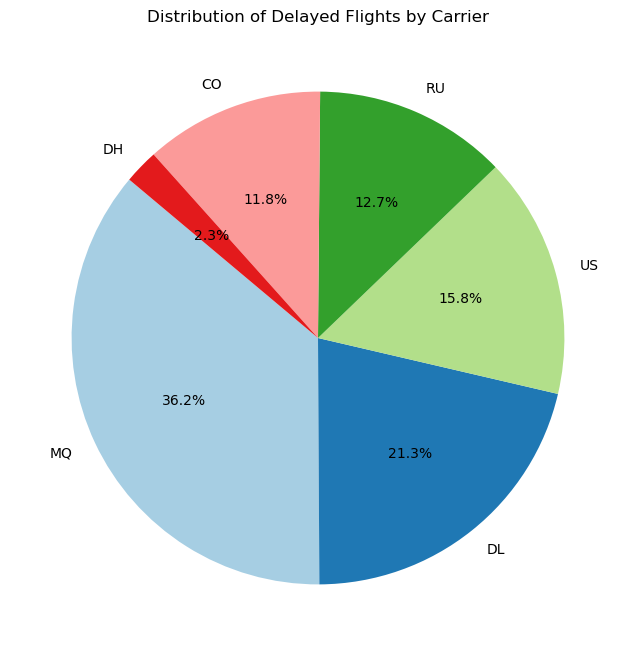

In [22]:
#delayed flights by carrier
delayed_flights = DCA_df[DCA_df['FLIGHT_STATUS'] == 'delayed']
carrier_delays = delayed_flights['CARRIER'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(carrier_delays, labels=carrier_delays.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Delayed Flights by Carrier')
plt.show() 

In [23]:
#RANDOM FOREST

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [29]:
le = LabelEncoder()
categorical_features = ['CARRIER', 'DEST', 'ORIGIN', 'TAIL_NUM', 'FL_NUM']
for feature in categorical_features:
    flights_df[feature] = le.fit_transform(flights_df[feature])

In [31]:
# Define feature set (X) and target variable (y)
X = flights_df.drop(columns=['FLIGHT_STATUS'])
y = flights_df['FLIGHT_STATUS']

In [32]:
# Encode the target variable
y = le.fit_transform(y)

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [36]:
# Print detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.44      0.57        84
           1       0.88      0.98      0.93       357

    accuracy                           0.88       441
   macro avg       0.85      0.71      0.75       441
weighted avg       0.87      0.88      0.86       441



In [39]:
#  want to see the importance of each feature
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

DEP_TIME        0.266249
DAY_OF_MONTH    0.166628
TAIL_NUM        0.151099
CRS_DEP_TIME    0.115237
FL_NUM          0.096691
DAY_WEEK        0.088795
CARRIER         0.034372
WEATHER         0.025791
DISTANCE        0.024797
DEST            0.018708
ORIGIN          0.011634
dtype: float64


In [41]:
#we have a problem of class imbalance, which means random sampling is not 50-50 split
# using Xboost
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.0/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.1/99.8 MB 573.4 kB/s eta 0:02:54
   ---------------------------------------- 0.1/99.8 MB 479.1 kB/s eta 0:03:29
   ---------------------------------------- 0.1/99.8 MB 504.4 kB/s eta 0:03:18
   ---------------------------------------- 0.1/99.8 MB 532.5 kB/s eta 0:03:08
   ---------------------------------------- 0.2/99.8 MB 655.9 kB/s eta 0:02:32
   ---------------------------------------- 0.4/99.8 MB 1.0 MB/s eta 0:01:38
   ---------------------------------------- 0.7/99.8 MB 1.8 MB/s eta 0:00:57
    --------------------------------------- 1.5/99.8 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 2.3/99.8 MB 4.8 MB/s eta 0:00:21
   - -------------------------------------- 3.3/99.8 MB 6.4 MB/s eta 

In [42]:
import xgboost as xgb

In [43]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
categorical_features = ['CARRIER', 'DEST', 'ORIGIN', 'TAIL_NUM', 'FL_NUM']
for feature in categorical_features:
    flights_df[feature] = le.fit_transform(flights_df[feature])

# Define feature set (X) and target variable (y)
X = flights_df.drop(columns=['FLIGHT_STATUS'])
y = flights_df['FLIGHT_STATUS']

# Encode the target variable
y = le.fit_transform(y)

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

In [48]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}


In [49]:
# Make predictions with the best model
y_pred = best_estimator.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# If you want to see the importance of each feature
feature_importances = pd.Series(best_estimator.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.50      0.64        84
           1       0.89      0.99      0.94       357

    accuracy                           0.89       441
   macro avg       0.89      0.74      0.79       441
weighted avg       0.89      0.89      0.88       441

WEATHER         0.328725
CRS_DEP_TIME    0.119727
DEP_TIME        0.105893
DAY_OF_MONTH    0.072748
DEST            0.065827
CARRIER         0.064602
DISTANCE        0.061199
FL_NUM          0.051292
DAY_WEEK        0.046253
TAIL_NUM        0.045225
ORIGIN          0.038508
dtype: float32


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM Classifier
svc = SVC(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions with the best model
y_pred = best_estimator.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))